# Business Problem

Head injuries and concussions have become a serious issue in professional sports, affecting the health of players and the winning potential of teams. The goal of this project is to predict which NHL players are more likely to suffer head injuries based on their past performance and other relevant information. This analysis is targeted towards NHL teams and team managers to help them take proactive measures to prevent head injuries and minimize the impact of such injuries on the team’s performance.

### 1. Obtain

Imports the packages including pandas, numpy, matplotlib, scipy, seaborn, scikit-learn, and imblearn. It also sets the random seed to ensure reproducibility. Also, imports a function named model_helper from a module, model_helper.py.

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from model_helper import model_helper


np.random.seed(86)
random.seed(86)

This code reads a csv file named "df.csv" into a Pandas DataFrame called "df" and then displays the DataFrame using the head() method.

In [3]:
df = pd.read_csv("data/df.csv")
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,head_injuries
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0


### 2. Scrub

The code in this cell outputs a list of unique values in the "season" column of the dataframe "df". This can be useful for getting an overview of the different seasons included in the data.

In [4]:
# check unique values of "season" column
df["season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21'], dtype=object)

Checking for null values in the df DataFrame using the isnull() method. The sum() method is then used to count the number of null values in each column. The result shows the total count of null values for each column in the DataFrame.

In [5]:
# look for missing values
df.isnull().sum()

player           0
team             0
gp               0
g                0
a                0
tp               0
ppg              0
pim              0
+/-              0
link             0
season           0
league           0
playername       0
position         0
fw_def           0
Name             0
Games Missed     0
head_injuries    0
dtype: int64

Checking for duplicated rows in the df dataframe and assigns them to the variable duplicates

In [6]:
# check for duplicate values 
duplicates = df[df.duplicated()]
duplicates

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,head_injuries
234,Serge Aubin (C/LW),Columbus Blue Jackets,81,13,17,30,0.37,107,-20,https://www.eliteprospects.com/player/8785/ser...,2000-01,nhl,Serge Aubin,C/LW,FW,Serge Aubin,2.0,1
1552,Brad Bombardir (D),Minnesota Wild,28,1,2,3,0.11,14,-6,https://www.eliteprospects.com/player/25131/br...,2001-02,nhl,Brad Bombardir,D,DEF,Brad Bombardir,1.0,1
5528,Matt Cullen (C),New York Rangers,80,16,25,41,0.51,52,0,https://www.eliteprospects.com/player/8754/mat...,2006-07,nhl,Matt Cullen,C,FW,Matt Cullen,7.0,1
7386,Brent Seabrook (D),Chicago Blackhawks,82,8,18,26,0.32,62,23,https://www.eliteprospects.com/player/8879/bre...,2008-09,nhl,Brent Seabrook,D,DEF,Brent Seabrook,2.0,1
7781,Derek Boogaard (LW),Minnesota Wild,51,0,3,3,0.06,87,3,https://www.eliteprospects.com/player/9084/der...,2008-09,nhl,Derek Boogaard,LW,FW,Derek Boogaard,5.0,1
10560,Patrick Eaves (RW/LW),Detroit Red Wings,10,0,1,1,0.1,2,0,https://www.eliteprospects.com/player/9144/pat...,2011-12,nhl,Patrick Eaves,RW/LW,FW,Patrick Eaves,1.0,1
14045,Pavel Zacha (C/LW),New Jersey Devils,1,0,2,2,2.0,0,4,https://www.eliteprospects.com/player/130786/p...,2015-16,nhl,Pavel Zacha,C/LW,FW,Pavel Zacha,4.0,1


This code removes duplicates from the DataFrame df and updates it.

In [7]:
# drop duplicates
df = df.drop_duplicates()

This code renames the columns of the df DataFrame using the rename() method.

In [8]:
# rename columns
df.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                   'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                  '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                  'Name': 'name', 'Games Missed': 'games_missed'}, inplace=True)


In [9]:
# view updated column names
df.columns

Index(['player', 'team', 'games_played', 'goals', 'assists', 'total_points',
       'points_per_game', 'penalty_minutes', 'team_goal_differential', 'link',
       'season', 'league', 'player_name', 'position', 'forward_defense',
       'name', 'games_missed', 'head_injuries'],
      dtype='object')

#### New Feature

This cell adds a new column called 'year' to 'df', which is taken from the 'season' column. The 'map()' method is used to apply a lambda function to each value of the 'season' column, which splits the string at the '-' character and takes the first part (i.e., the starting year of the season). The values are then converted to integers and added to the new 'year' column. 

In [10]:
# filter dataframe to only be the player and for the season to be before the season that I am checking
df['year'] = df['season'].map(lambda x: int(x.split('-')[0]))
df.head()

,player,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,link,season,league,player_name,position,forward_defense,name,games_missed,head_injuries,year
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0,2000
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0,2000
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0,2000
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0,2000
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0,2000


This code cell adds a new column to the dataframe named 'previous_head_injuries', and iterates through each row of the dataframe to calculate the total number of head injuries a player has had in previous years.The count of head injuries is calculated by filtering the rows where the player name matches the current player, and the year is less than the current year, and then summing the total head injuries for those rows. The calculated value is then assigned to the 'previous_head_injuries' column of the current row.

In [11]:
# feature engineer a new column that illustrates whether a player had a previous head injury
df['previous_head_injuries'] = 0
for index, row in df.iterrows():
    number_of_head_injuries = df[(df['player'] == row['player']) & 
                              (df['year'] < row['year'])]['head_injuries'].sum()
    df.loc[index, 'previous_head_injuries'] = number_of_head_injuries

This code drops several columns from the DataFrame df using the drop() method, namely 'player', 'link', 'name', 'season', 'forward_defense', 'games_missed', and 'year'.

In [12]:
# drop unnecessary columns
df.drop(columns=['player', 'link', 'name', 'season', 'forward_defense', 'games_missed', 'year'], 
        axis=1, inplace=True)

In [13]:
# view updated dataframe
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,league,player_name,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,nhl,Jaromír Jágr,RW,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,nhl,Joe Sakic,C,0,0
2,New Jersey Devils,82,40,56,96,1.17,51,45,nhl,Patrik Elias,LW,0,0
3,Pittsburgh Penguins,79,44,51,95,1.2,96,12,nhl,Alexei Kovalev,RW,0,0
4,Boston Bruins,82,36,59,95,1.16,85,-8,nhl,Jason Allison,C,0,0


Checking for more than one value in this column, but it only displays one value

In [14]:
# view unique values in 'league' column. 
df['league'].unique().sum()

'nhl'

Drop player_name and league from the dataframe. The column, 'player_name' is not needed and 'league' has only one value

In [15]:
df.drop(columns=['player_name', 'league'], axis=1, inplace=True)

In [16]:
# view number of rows and columns of dataframe
df.shape

(18743, 11)

The dataframe 'df' has six numerical columns: games_played, goals, assists, total_points, head_injuries, and previous_head_injuries. The minimum value of the 'games_played' column is 0, and the maximum value is 85, with a mean of 47.98 and a standard deviation of 28.50. For `head_injuries` and the `previous_head_injuries` columns, both contain binary data.

In [17]:
# view distribution of numerical columns
df.describe()

,games_played,goals,assists,total_points,head_injuries,previous_head_injuries
count,18743.00000,18743.000000,18743.000000,18743.000000,18743.000000,18743.000000
mean,47.98250,7.374006,12.543296,19.917409,0.059756,0.275089
std,28.50025,8.773579,12.970725,20.590198,0.237040,0.683886
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.00000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,55.00000,4.000000,9.000000,13.000000,0.000000,0.000000
75%,75.00000,11.000000,19.000000,31.000000,0.000000,0.000000
max,85.00000,65.000000,96.000000,128.000000,1.000000,11.000000


The following code uses pandas library to replace values in the 'position' column of a dataframe 'df' with the values in the dictionary 'mapping'.

In [18]:
# condense values in the "position" column to be either center, wing, or defense
# Define the mapping for column 'position'
mapping = {'RW': 'Wing', 'C': 'Wing', 'LW': 'Wing', 'D': 'Defense', 'LW/RW': 'Wing', 'RW/LW': 'Wing', 'W/C': 'Wing',
           'C/LW': 'Center', 'C/RW': 'Center', 'RW/C': 'Wing', 'LW/C': 'Wing', 'D/RW': 'Defense', 'D/LW': 'Defense', 'D/C':
           'Defense', 'RW/D': 'Wing', 'C/W': 'Center', 'C/D': 'Center', 'F': 'Wing','LW/D': 'Wing', 'D/W': 'Defense'}

# Replace the values in column 'position'
df['position'] = df['position'].replace(mapping)
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,Wing,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,Wing,0,0
2,New Jersey Devils,82,40,56,96,1.17,51,45,Wing,0,0
3,Pittsburgh Penguins,79,44,51,95,1.2,96,12,Wing,0,0
4,Boston Bruins,82,36,59,95,1.16,85,-8,Wing,0,0


The columns,'points_per_game', 'penalty_minutes', 'team_goal_differential', and 'position', are objects. These columns need to be changed to numerical or dummied.

In [19]:
# view df data types
df.dtypes

team                      object
games_played               int64
goals                      int64
assists                    int64
total_points               int64
points_per_game           object
penalty_minutes           object
team_goal_differential    object
position                  object
head_injuries              int64
previous_head_injuries     int64
dtype: object

This code selects three columns from the dataframe 'df' specified by the list of column names 'columns'. For each of these columns, the code filters out any rows where the column value is '-' using the '!= operator'. Then, the code converts the remaining values in the column to floating-point numbers using the 'astype()' method. The dataframe is stored in 'df'.

In [20]:
# change incorrectly labeled string columns to floats
columns = ['points_per_game', 'penalty_minutes', 'team_goal_differential']
for column in columns:
    df = df[df[column] != '-']
    df[column] = df[column].astype(float)

The following code creates a heatmap visualization for a dataframe 'df'. This code first selects the columns with continuous variables from the 'df' dataframe using the 'select_dtypes()' method and stores them in a new dataframe 'df_continuous'. Then, it creates a correlation matrix from the continuous variables in the 'df_continuous' dataframe using the 'corr()' method. The code uses 'heatmap()' function to make a visualization from the correlation matrix. Finally, the heatmap is displayed using the 'show()' method. The heatmap displays the correlations between pairs of continuous variables in the dataframe. 

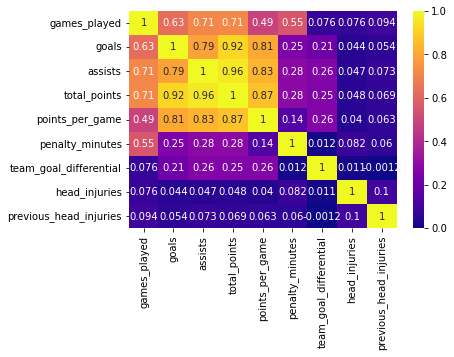

In [21]:
# heatmap of dataframe

# Select only the continuous variables from the DataFrame
df_continuous = df.select_dtypes(include=[np.number])

# create a correlation matrix from the dataFrame
corr_matrix = df_continuous.corr()

# create a heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='plasma' )

# display the heatmap
plt.show()

Dataframe currently has 18,723 rows and 11 columns

In [22]:
df.shape

(18723, 11)

In [23]:
# view dataframe
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,Wing,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,Wing,0,0
2,New Jersey Devils,82,40,56,96,1.17,51.0,45.0,Wing,0,0
3,Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,Wing,0,0
4,Boston Bruins,82,36,59,95,1.16,85.0,-8.0,Wing,0,0


The columns, `team` and `position` still have the object datatype and need to be dummied.

In [24]:
# view datatypes
df.dtypes

team                       object
games_played                int64
goals                       int64
assists                     int64
total_points                int64
points_per_game           float64
penalty_minutes           float64
team_goal_differential    float64
position                   object
head_injuries               int64
previous_head_injuries      int64
dtype: object

Bar plot shows the target column, `head_injuries` as an imbalanced class.

In [25]:
df['head_injuries'].value_counts(normalize=True)

0    0.940234
1    0.059766
Name: head_injuries, dtype: float64

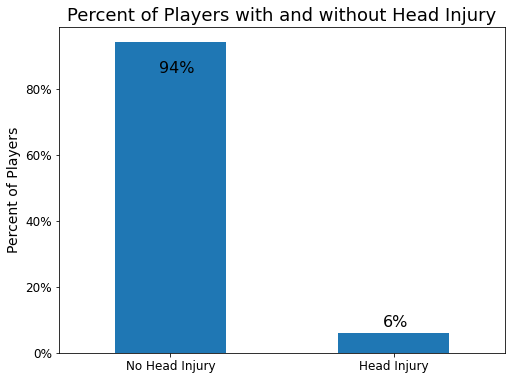

In [26]:
ax = df['head_injuries'].value_counts(normalize=True).mul(100).plot(kind = 'bar', figsize=(8, 6))
plt.xticks([0, 1], ['No Head Injury', 'Head Injury'], rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Percent of Players', fontsize=14)
plt.title('Percent of Players with and without Head Injury', fontsize=18)
plt.text(-0.05, 85, '94%', fontsize=16)
plt.text(.95, 8, '6%', fontsize=16);

### 3. Explore

Defense positions in hockey have a slightly higher number of head injuries demonstrated by the below bar plot.

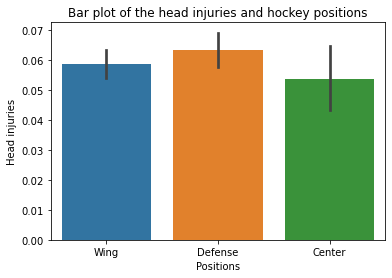

In [27]:
# Plot a bar plot of the head_injuries and a positions columns
sns.barplot(x=df['position'], y=df['head_injuries'])
plt.xlabel('Positions')
plt.ylabel('Head injuries')
plt.title('Bar plot of the head injuries and hockey positions')
plt.show()


Buffalo Sabres, Edmonton Oilers, and Colorado Avalanche are at the top of this bar plot with the most number of head injuries. 

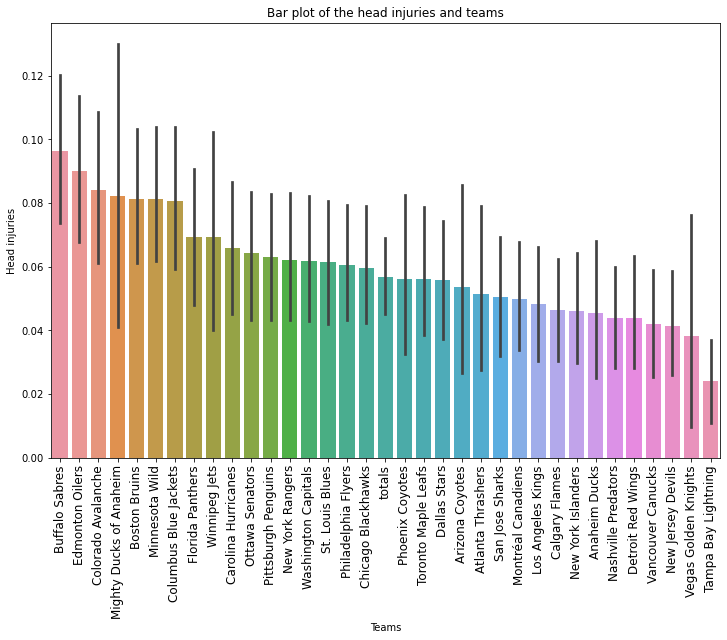

In [28]:
# Plot a bar plot of the head_injuries and the team column
fig = plt.figure(figsize=(12, 8))
# Define the order of the categories
order = df.groupby('team')['head_injuries'].mean().sort_values(ascending=False).index
sns.barplot(x=df['team'], y=df['head_injuries'], order=order)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Teams')
plt.ylabel('Head injuries')
plt.title('Bar plot of the head injuries and teams')
plt.show()

This code creates dummy variables for all categorical columns in the df. Identifies all the categorical columns using select_dtypes(include=['object']) method and assigns them to the categorical_columns variable. Then it loops through each column in the categorical_columns variable, creates dummy variables using the get_dummies() function, and prefixes the column name to each dummy variable using the prefix argument.

It then concatenates the df with the newly created dummy variables along the column axis, drops the original categorical column using the drop() method along the column axis, and assigns the resulting DataFrame to df

In [29]:
# dummy categorical columns
# Get list of all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

### 4. Model

Set the variable, X, by dropping the target variable, `head_injuries` and set the variable, y, to equal `df['head_injuries`].

In [30]:
# Separate the features and target variable
X = df.drop('head_injuries', axis=1)
y = df['head_injuries']

#### Model_helper function

This code is running 5 different classification models to compare their f1_score results. The best F1 score here is with the Random Forest Classifier, F1 Score (Training): 0.9796814936847885 and F1 Score (Testing): 0.16923076923076924.

In [31]:
# running 5 models to see which one has the best f1_score
models = [LogisticRegression(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(random_state=86),
          SVC(),
          GradientBoostingClassifier()]

for model in models:
    print(f"Results for {type(model).__name__}")
    model_helper(X, y, model)
    print('----------------'*5)


Results for LogisticRegression


C:\Users\Jeff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.9177460275070103
Testing Score: 0.9279038718291055
F1 Score (Training): 0.05810397553516819
F1 Score (Testing): 0.028776978417266185
--------------------------------------------------------------------------------
Results for DecisionTreeClassifier
Training Score: 0.9975297102416878
Testing Score: 0.8875834445927904
F1 Score (Training): 0.979591836734694
F1 Score (Testing): 0.1596806387225549
--------------------------------------------------------------------------------
Results for RandomForestClassifier
Training Score: 0.9975297102416878
Testing Score: 0.9423230974632844
F1 Score (Training): 0.9796814936847885
F1 Score (Testing): 0.16923076923076924
--------------------------------------------------------------------------------
Results for SVC
Training Score: 0.527840833222059
Testing Score: 0.5238985313751668
F1 Score (Training): 0.15
F1 Score (Testing): 0.13151485630784218
--------------------------------------------------------------------------------
Results f

Applying grid search to the best model, random forest classifier. Shows that a random forest classifier with these hyperparameters, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100 will produce the best f1_score of F1 Score (Training): 0.804642166344294 and F1 Score (Testing): 0.12658227848101267.


In [32]:
# Since the RandomForestClassifier has the best, albiet low, f1_score, I will apply a grid search
# to find the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 86)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=86)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1,
                  verbose=4)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding f1 score
print("Best Hyperparameters:", grid_search.best_params_)
rf_optimal = RandomForestClassifier(**grid_search.best_params_, random_state=86)
model_helper(X, y, rf_optimal, feature_importance=True)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training Score: 0.979770329817065
Testing Score: 0.9447263017356475
F1 Score (Training): 0.804642166344294
F1 Score (Testing): 0.12658227848101267
                        features  importance
0                   games_played    0.082755
5                penalty_minutes    0.079421
6         team_goal_differential    0.067305
44              position_Defense    0.063727
45                 position_Wing    0.062525
4                points_per_game    0.058475
3                   total_points    0.047227
43               position_Center    0.043045
2                        assists    0.041569
1                          goals    0.035654
42                   team_totals    0.031528
7         previous_head_injuries    0.018946
28       team_New York Islanders    0.014370
37      team_Toronto Maple Leafs    0.013460
36   

RandomForestClassifier(min_samples_split=5, random_state=86)

Try 3 years instead of 1 to predict head injuries

Since the random forest classifier with grid search did not achieve a high f1_score, I want to try the OSEMN method again, but this time with combining the target variable to include 3 years. Is it possible to better predict if a player will get a head injury in the next three years, rather than in the next year as I tried in the previous code?

### Obtain:

The first line loads the data from the CSV file and assigns it to the df_3 variable. The second line adds a new column to the DataFrame called "year" using the map() method to apply a lambda function to each element of the "season" column, which extracts the first part of the season string and converts it to an integer. 

In [33]:
# head injury in the next 3 years 
df_3 = pd.read_csv("data/df.csv")
# add column, "year"
df_3['year'] = df_3['season'].map(lambda x: int(x.split('-')[0]))


### Scrub/Explore:

Make a new column, `head_injury_3`, that will be used to bin head_injury data for the next 3 years, rather than just the next year.

In [34]:
df_3['head_injury_3'] = 0

for index, row in df_3.iterrows():
    num_head_inj = df_3[(df_3['player'] == row['player']) & (df_3['year'] > row['year']) & 
      (df_3['year'] <= row['year'] + 5)]['head_injuries'].sum()
    df_3.loc[index, 'head_injury_3'] = num_head_inj

Remove duplicates from dataframe, df_3.

In [35]:
# find and remove duplicates
duplicates = df_3[df_3.duplicated()]
df_3 = df_3.drop_duplicates()

Same as before, converting columns to floats to better run in the models.

In [36]:
# Convert columns with numeric values to floats
columns = ['pim', 'ppg', '+/-']
for column in columns:
    df_3 = df_3[df_3[column] != '-']
    df_3[column] = df_3[column].astype(float)

Rename columns in a standardized, readable format.

In [37]:
# Rename columns
df_3.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                       'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                      '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                      'Name': 'name', 'Games Missed': 'games_missed'}, inplace=True)

In [38]:
df_3.head()

,player,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,link,season,league,player_name,position,forward_defense,name,games_missed,head_injuries,year,head_injury_3
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0,2000,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0,2000,1
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51.0,45.0,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0,2000,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0,2000,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85.0,-8.0,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0,2000,1


Change values in the position column to be only center, wing, or defense, will dummy later. 

In [39]:
# Condense values in the "position" column to be either center, wing, or defense
mapping = {'RW': 'Wing', 'C': 'Wing', 'LW': 'Wing', 'D': 'Defense', 'LW/RW': 'Wing', 'RW/LW': 'Wing', 'W/C': 'Wing',
           'C/LW': 'Center', 'C/RW': 'Center', 'RW/C': 'Wing', 'LW/C': 'Wing', 'D/RW': 'Defense', 'D/LW': 'Defense',
           'D/C': 'Defense', 'RW/D': 'Wing', 'C/W': 'Center', 'C/D': 'Center', 'F': 'Wing','LW/D': 'Wing',
           'D/W': 'Defense'}
df_3['position'] = df_3['position'].replace(mapping)

The following Python code creates a new binary column in the DataFrame `df_3` based on the values in the `head_injury_3` column.

In [40]:
# Add new column "head_injury_3_bin" and populate it based on the values in "head_injury_3"
df_3['head_injury_3_bin'] = np.where(df_3['head_injury_3'] > 0, 1, 0)


View the difference between the original distribution of the target variable and the new target variable, 'head_injury_3_bin`. The original target variable had 6% percent head injuries, whereas the new target variable has 13% head injuries. 

In [41]:
# Print value counts of "head_injuries" and "head_injury_3_bin"
print(df_3['head_injuries'].value_counts(normalize=True))
print(df_3['head_injury_3_bin'].value_counts(normalize=True))

0    0.940234
1    0.059766
Name: head_injuries, dtype: float64
0    0.866101
1    0.133899
Name: head_injury_3_bin, dtype: float64


In [42]:
# view dataframe
df_3.head(2)

,player,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,link,...,league,player_name,position,forward_defense,name,games_missed,head_injuries,year,head_injury_3,head_injury_3_bin
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,https://www.eliteprospects.com/player/8627/jar...,...,nhl,Jaromír Jágr,Wing,FW,0,0.0,0,2000,0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,https://www.eliteprospects.com/player/8862/joe...,...,nhl,Joe Sakic,Wing,FW,0,0.0,0,2000,1,1


Drop columns so that it matches the original dataframe, df.

In [43]:
# drop unnecessary columns
df_3.drop(columns=['player', 'link', 'league', 'player_name',  'name', 'season', 'forward_defense',
                   'games_missed', 'year', 'head_injuries', 'head_injury_3'], 
        axis=1, inplace=True)

In [44]:
# view dataframe
df_3.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injury_3_bin
0,Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,Wing,0
1,Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,Wing,1
2,New Jersey Devils,82,40,56,96,1.17,51.0,45.0,Wing,0
3,Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,Wing,0
4,Boston Bruins,82,36,59,95,1.16,85.0,-8.0,Wing,1


Datatypes in df_3 still have two object columns.

In [45]:
# check datatypes
df_3.dtypes

team                       object
games_played                int64
goals                       int64
assists                     int64
total_points                int64
points_per_game           float64
penalty_minutes           float64
team_goal_differential    float64
position                   object
head_injury_3_bin           int32
dtype: object

Use get_dummies() to dummify the remaining two object columns. 

In [46]:
# dummy categorical columns
# Get list of all categorical columns
categorical_columns = df_3.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df_3[column], prefix=column)
    df_3 = pd.concat([df_3, dummies], axis=1)
    df_3.drop(column, axis=1, inplace=True)

In [47]:
# view dataframe
df_3.head()

,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,head_injury_3_bin,team_Anaheim Ducks,team_Arizona Coyotes,...,team_Tampa Bay Lightning,team_Toronto Maple Leafs,team_Vancouver Canucks,team_Vegas Golden Knights,team_Washington Capitals,team_Winnipeg Jets,team_totals,position_Center,position_Defense,position_Wing
0,81,52,69,121,1.49,42.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,82,54,64,118,1.44,30.0,45.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,82,40,56,96,1.17,51.0,45.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,79,44,51,95,1.20,96.0,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,82,36,59,95,1.16,85.0,-8.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Create the X and y variables for modeling using `head_injury_3_bin` as the target variable. 

In [48]:
# Separate the features and target variable
X = df_3.drop('head_injury_3_bin', axis=1)
y = df_3['head_injury_3_bin']

A random forest classifier is instantiated with RandomForestClassifier(random_state=86). This classifier is passed, along with the predictor variables X, target variable y, and a boolean flag feature_importance=True, to the model_helper() function.

The F1 score is provided for both the training and testing data. The F1 score is a measure of the classifier's accuracy that takes into account both precision and recall. The model that provided the best F1 score is 0.24079320113314448.

The output shows the importance of each feature in the classifier's prediction.The features show the most important feature (penalty_minutes) listed first and the least important feature (team_Mighty Ducks of Anaheim) listed last.


In [49]:
rf_3 = RandomForestClassifier(random_state=86)

model_helper(X, y, rf_3, feature_importance=True)

Training Score: 0.995660301775938
Testing Score: 0.8582109479305741
F1 Score (Training): 0.9836642372455391
F1 Score (Testing): 0.24680851063829784
                        features  importance
5                penalty_minutes    0.105603
6         team_goal_differential    0.090053
0                   games_played    0.089174
4                points_per_game    0.079747
3                   total_points    0.062507
2                        assists    0.055208
1                          goals    0.049594
43              position_Defense    0.047506
44                 position_Wing    0.039128
42               position_Center    0.038264
41                   team_totals    0.030187
25      team_Nashville Predators    0.012437
26        team_New Jersey Devils    0.011659
21        team_Los Angeles Kings    0.011450
35      team_Tampa Bay Lightning    0.011019
18        team_Detroit Red Wings    0.010830
24       team_Montréal Canadiens    0.010746
30      team_Philadelphia Flyers    0.0106

RandomForestClassifier(random_state=86)

A dummy classifier is shown here to illustrate that using a baseline model, the F1 score is 0. It passes the model to the function model_helper() along with other arguments (X, y, and feature_importance).

In [50]:
dummy = DummyClassifier(random_state=86)

model_helper(X, y, dummy,
             feature_importance=False)

Training Score: 0.8665375884630792
Testing Score: 0.8643524699599466
F1 Score (Training): 0.0
F1 Score (Testing): 0.0


DummyClassifier(random_state=86)

### 5. Interpret

Accuracy: 0.8852809228797266


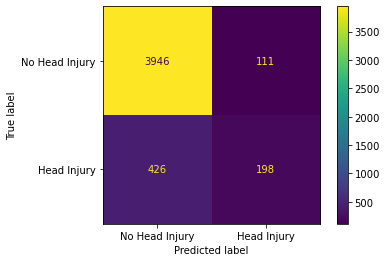

In [51]:
# Interpret the results
# Make predictions on the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=86)
y_pred = rf_3.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
#print("Confusion matrix:\n", cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Head Injury', 'Head Injury'])
disp.plot()
plt.show()

- 3,946 instances where the player did not have a head injury and the model predicted them not to have a head injury (true negative)
- 198 instances where the player had a head injury and the model predicted them to have a head injury (true positive)
- 426 instances where the player did have a head injury and the model predicted them not to have a head injury (false negative).  These instances could be due to the randomness of concussions, the way they play does not lead to concussions but they still got one 
- 111 instances where the player did not have a head injury and the model predicted them to have a head injury (false positive).  These instances are players that while they have not had a head injury, the way they play leads them to have a higher probability of a head injury

## Use Model to Predict Players with Most Risk for Head Injury This Year